In [59]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

#Directory
DATADIR = "nft"

CATEGORIES = ["azuki", "boredapeyachtclub", "coolcat", "proof-moonbirds", "cryptopunks"] 


# Check whether the directory is working

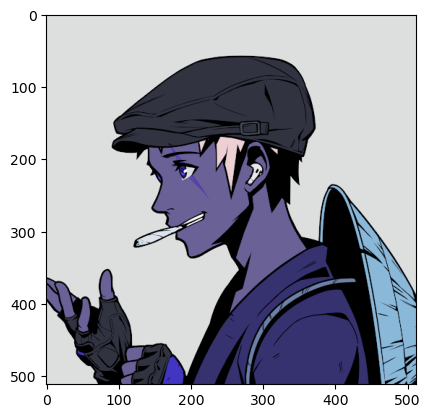

In [49]:
path = os.path.join(DATADIR, "azuki") 
img_array = cv2.imread(os.path.join(path, os.listdir(path)[1]))
plt.imshow(img_array, cmap="gray")
plt.show()

In [50]:
img_array.shape

(512, 512, 3)

# Data Preprocessing

In [51]:
training_data = []
IMG_SIZE = 300

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to NFTs
        class_num = CATEGORIES.index(category) #class_num = 0,1,2,3,4 represent "azuki", "boredapeyachtclub", "coolcat", "proof-moonbirds", "cryptopunks"#
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #import image#
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) #resize image#
                training_data.append([new_array, class_num]) #add value in training_data, such as class_num#
            except Exception as e: #error data#
                pass
            
            
create_training_data()

len(training_data)

1500

### Divide the training data into X and y

In [52]:
X = [] 
y = [] 
for features, label in training_data:
    X.append(features)
    y.append(label)

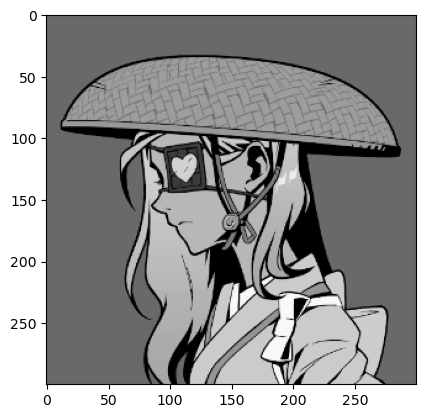

azuki


In [53]:
new_array = cv2.resize(X[3], (IMG_SIZE,IMG_SIZE))
plt.imshow(X[3], cmap = "gray")
plt.show()
print(CATEGORIES[y[3]])

### Flatten X

In [54]:
X = np.array(X).reshape(-1, IMG_SIZE * IMG_SIZE) 
X[1]

array([222, 222, 222, ...,  17,  10,   0], dtype=uint8)

In [55]:
X=normalize(X)

# Create model

In [62]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import warnings
from sklearn.model_selection import RandomizedSearchCV 
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

pca = PCA(n_components = 0.96, whiten = True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

rand_list = {"C": [.01, .1, 1, 5, 10, 100],
            "gamma": [0, .01, .1, 1, 5, 10, 100],
            "kernel": ["rbf"],
            "random_state": [1]}
rand_search = RandomizedSearchCV(SVC(), param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc)

rand_search.fit(X, y) 
rand_search.cv_results_

/Users/lekshyuen/Documents/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lekshyuen/Documents/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: auc() takes 2 positional arguments but 3 were given

  warnings.warn(
/Users/lekshyuen/Documents/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lekshyuen/Documents/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_t

{'mean_fit_time': array([ 82.64631232,  57.36955937, 169.72816189, 138.53247571,
        141.97519692,  36.88793381,  35.83873566, 181.49683706,
        171.95677392, 164.74083805, 150.09619697,  43.82349189,
        182.3139267 , 180.08519403,  64.09147064, 130.08489219,
        112.57120442,  94.83394225, 208.45523381, 135.22121938]),
 'std_fit_time': array([ 2.41166779,  2.42765136,  6.41263178,  3.1059518 ,  8.86571241,
         0.61977221,  0.41510333,  3.63627843,  2.46167283,  2.34795574,
         5.46396481,  1.27219526,  4.5104206 , 12.62400609,  1.58598866,
         1.3573895 ,  6.25135437,  8.3757597 ,  6.42388564, 38.54880935]),
 'mean_score_time': array([0.00246358, 0.00219266, 0.00124216, 0.00131098, 0.00229287,
        0.00055242, 0.00081937, 0.00141597, 0.00302617, 0.00350595,
        0.00310628, 0.00065939, 0.00857615, 0.00355124, 0.00111039,
        0.0057377 , 0.00192459, 0.00249497, 0.00354862, 0.0013117 ]),
 'std_score_time': array([5.67558954e-04, 2.44870029e-04, 

In [66]:
svm_pca = SVC(kernel='rbf', gamma=0.001, C=100, random_state=1) 
svm_pca.fit(X_train_pca, y_train) 

y_pred = svm_pca.predict(X_test_pca)
f_score = f1_score(y_test, y_pred, average='macro')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        63
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [43]:
scores = cross_val_score(SVC(), X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00
